In [1]:
!pip3 install seaborn
!pip3 install matplotlib
!pip3 install pandas
!pip3 install numpy
!pip3 install scikit-learn
!pip3 install seaborn
!pip3 install statsmodels
!pip3 install scipy
!pip3 install numpy

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


df = pd.read_excel("./Croq'Pain.xlsx", skiprows=2)
df.head()


,STOR,EARN,K,SIZE,EMPL,total,P15,P25,P35,P45,P55,INC,COMP,NCOMP,NREST,PRICE,CLI
0,1,28.339673,861.0718,129.0,14,8580.0,980.0,1280.0,560.0,1000.0,3100.0,27.6,8.0,1.0,45.0,16.1,129.0
1,2,-1.455001,630.3028,91.0,12,8460.0,1290.0,720.0,1200.0,1490.0,3100.0,28.3,2.0,2.0,27.0,11.4,116.0
2,3,68.932678,1074.4360,140.0,13,19250.0,2940.0,2490.0,3710.0,4030.0,5270.0,30.2,5.0,4.0,5.0,21.7,142.0
3,4,202.073327,882.0064,184.0,7,20920.0,3570.0,4930.0,4420.0,4300.0,2960.0,27.6,2.0,1.0,7.0,11.8,138.0
4,5,115.778511,930.6688,144.0,14,11660.0,1700.0,1140.0,2200.0,2140.0,2630.0,33.9,1.0,3.0,25.0,16.6,126.0


In [4]:
# get the stores before 1994
stores_before_94 = df.iloc[:50]
stores_before_94 = stores_before_94.iloc[:, 1:]
stores_before_94.head()

,EARN,K,SIZE,EMPL,total,P15,P25,P35,P45,P55,INC,COMP,NCOMP,NREST,PRICE,CLI
0,28.339673,861.0718,129.0,14,8580.0,980.0,1280.0,560.0,1000.0,3100.0,27.6,8.0,1.0,45.0,16.1,129.0
1,-1.455001,630.3028,91.0,12,8460.0,1290.0,720.0,1200.0,1490.0,3100.0,28.3,2.0,2.0,27.0,11.4,116.0
2,68.932678,1074.4360,140.0,13,19250.0,2940.0,2490.0,3710.0,4030.0,5270.0,30.2,5.0,4.0,5.0,21.7,142.0
3,202.073327,882.0064,184.0,7,20920.0,3570.0,4930.0,4420.0,4300.0,2960.0,27.6,2.0,1.0,7.0,11.8,138.0
4,115.778511,930.6688,144.0,14,11660.0,1700.0,1140.0,2200.0,2140.0,2630.0,33.9,1.0,3.0,25.0,16.6,126.0


In [5]:
def move_column_to_end(df:pd.DataFrame, column_name:str) -> pd.DataFrame:
    columns = list(df.columns) 
    columns.remove(column_name)
    columns.append(column_name)
    return df[columns]


stores_before_94 = move_column_to_end(stores_before_94, 'EARN')
stores_before_94.head()



,K,SIZE,EMPL,total,P15,P25,P35,P45,P55,INC,COMP,NCOMP,NREST,PRICE,CLI,EARN
0,861.0718,129.0,14,8580.0,980.0,1280.0,560.0,1000.0,3100.0,27.6,8.0,1.0,45.0,16.1,129.0,28.339673
1,630.3028,91.0,12,8460.0,1290.0,720.0,1200.0,1490.0,3100.0,28.3,2.0,2.0,27.0,11.4,116.0,-1.455001
2,1074.4360,140.0,13,19250.0,2940.0,2490.0,3710.0,4030.0,5270.0,30.2,5.0,4.0,5.0,21.7,142.0,68.932678
3,882.0064,184.0,7,20920.0,3570.0,4930.0,4420.0,4300.0,2960.0,27.6,2.0,1.0,7.0,11.8,138.0,202.073327
4,930.6688,144.0,14,11660.0,1700.0,1140.0,2200.0,2140.0,2630.0,33.9,1.0,3.0,25.0,16.6,126.0,115.778511


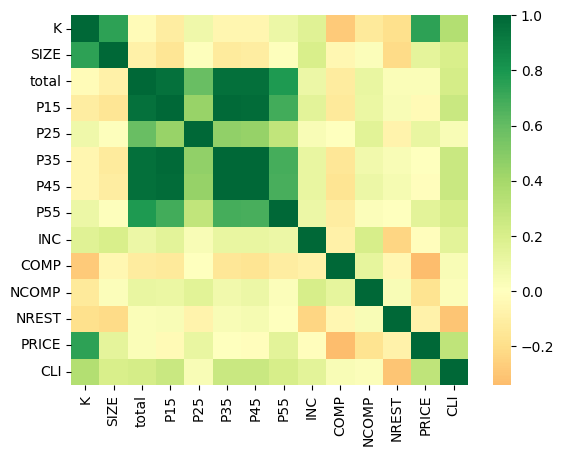

In [12]:

p = sns.heatmap(stores_before_94.corr('spearman', numeric_only=True), center=0, cmap='RdYlGn')

In [7]:
import statsmodels.api as sm

def backward_elimination(X, y, sl):
    X = sm.add_constant(X)
    while(True):
        regressor_OLS = sm.OLS(endog=y.astype(float), exog=X.astype(float)).fit()
        ind = np.argmax(regressor_OLS.pvalues[1:])
        maxPvalue = regressor_OLS.pvalues[ind+1]
        if maxPvalue > sl:
            column = X.columns[ind+1]
            print("delete column", column, "with pvalue", maxPvalue)
            X = X.drop(column, axis=1)
            
        else:
            print(regressor_OLS.summary())
            X = X.drop('const', axis=1)
            return X

y = stores_before_94['EARN']
X = stores_before_94.iloc[:, :-1]

# use backward elimination to remove the columns with pvalue > 0.05
X = backward_elimination(X, y, 0.05)

delete column P55 with pvalue 0.8671044330282645
delete column total with pvalue 0.8289218649929384
delete column P35 with pvalue 0.785455642956572
delete column P45 with pvalue 0.8270006009485477
delete column NCOMP with pvalue 0.7649951568994933
delete column COMP with pvalue 0.6889368990928648
delete column P25 with pvalue 0.3808765147729082
delete column CLI with pvalue 0.19811101508817727
delete column EMPL with pvalue 0.15170096432437594
delete column PRICE with pvalue 0.16935219958644337
                            OLS Regression Results                            
Dep. Variable:                   EARN   R-squared:                       0.872
Model:                            OLS   Adj. R-squared:                  0.857
Method:                 Least Squares   F-statistic:                     59.89
Date:                Wed, 20 Dec 2023   Prob (F-statistic):           1.61e-18
Time:                        17:36:36   Log-Likelihood:                -242.82
No. Observations:         

In [8]:
stores_94 = df.iloc[51:61]
stores_94 = stores_94.iloc[:, 1:]
stores_94

,EARN,K,SIZE,EMPL,total,P15,P25,P35,P45,P55,INC,COMP,NCOMP,NREST,PRICE,CLI
51,216.280373,775.9792,146.0,11,17440.0,2800.0,2350.0,3180.0,3050.0,5490.0,32.1,2.0,6.0,26.0,11.6,124.0
52,65.693555,647.7520,62.0,11,12880.0,2020.0,1780.0,2810.0,3000.0,2010.0,32.7,7.0,7.0,70.0,18.0,125.0
53,67.63784,689.8432,96.0,9,14310.0,2320.0,1040.0,2420.0,2770.0,4380.0,30.0,1.0,6.0,7.0,13.6,134.0
54,127.94273,715.0180,86.0,10,12990.0,2480.0,2380.0,2530.0,2670.0,1420.0,34.4,3.0,5.0,17.0,16.5,122.0
55,82.938446,650.0608,88.0,8,16380.0,1870.0,3290.0,2520.0,2660.0,4390.0,28.8,3.0,3.0,16.0,12.8,134.0
56,-2.880188,788.4112,72.0,7,21360.0,3310.0,3590.0,3730.0,3970.0,5450.0,28.7,2.0,8.0,10.0,24.3,129.0
57,247.737268,781.9510,119.0,7,23400.0,3620.0,3820.0,5680.0,4260.0,6060.0,33.4,2.0,10.0,63.0,13.3,121.0
58,343.015803,1557.8410,285.0,8,22830.0,4160.0,1230.0,5120.0,5200.0,5670.0,27.6,2.0,3.0,40.0,18.3,116.0
59,193.141365,935.5750,193.0,8,13510.0,1950.0,2360.0,2310.0,2320.0,3480.0,28.7,1.0,9.0,34.0,12.5,112.0
60,277.527489,687.9784,92.0,12,25490.0,4890.0,1800.0,6070.0,5960.0,5890.0,36.0,1.0,8.0,31.0,14.1,127.0


In [9]:
new_stores = df.iloc[62:72]
new_stores = new_stores.iloc[:, 1:]
new_stores

,EARN,K,SIZE,EMPL,total,P15,P25,P35,P45,P55,INC,COMP,NCOMP,NREST,PRICE,CLI
62,NaN,660.1396,54.0,*,6710.0,600.0,2570.0,430.0,690.0,1440.0,38.4,4.0,5.0,18.0,21.7,131.0
63,NaN,733.0000,120.0,*,11040.0,1300.0,1400.0,2110.0,1090.0,2680.0,31.3,7.0,6.0,21.0,12.5,115.0
64,NaN,1050.3490,135.0,*,11910.0,2210.0,1850.0,2330.0,2240.0,2170.0,29.0,1.0,4.0,13.0,21.7,135.0
65,NaN,836.0000,245.0,*,11350.0,3400.0,3000.0,2570.0,1200.0,1350.0,37.0,5.0,8.0,62.0,12.5,136.0
66,NaN,783.6160,96.0,*,3500.0,260.0,700.0,500.0,1200.0,2000.0,30.0,12.0,7.0,38.0,18.0,130.0
67,NaN,924.8080,197.0,*,12720.0,1650.0,1960.0,2300.0,1780.0,4390.0,23.0,1.0,9.0,41.0,12.0,136.0
68,NaN,1089.5764,93.0,*,16660.0,2570.0,2940.0,2820.0,2720.0,4450.0,25.2,2.0,0.0,5.0,33.4,133.0
69,NaN,737.6620,169.0,*,9410.0,780.0,1940.0,880.0,1080.0,3450.0,30.1,4.0,4.0,11.0,9.0,126.0
70,NaN,584.0000,149.0,*,19020.0,2500.0,2680.0,4600.0,4567.0,3000.0,28.6,4.0,5.0,26.0,13.4,128.0
71,NaN,681.0000,150.0,*,12650.0,1650.0,1320.0,1000.0,3400.0,2370.0,34.9,3.0,12.0,54.0,15.4,128.0
